In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import quad
import numpy as np
import corner
import emcee
print(emcee.__version__)

3.0rc1


In [43]:
N =200
z =np.linspace(0,5,N) 
z

array([0.        , 0.02512563, 0.05025126, 0.07537688, 0.10050251,
       0.12562814, 0.15075377, 0.1758794 , 0.20100503, 0.22613065,
       0.25125628, 0.27638191, 0.30150754, 0.32663317, 0.35175879,
       0.37688442, 0.40201005, 0.42713568, 0.45226131, 0.47738693,
       0.50251256, 0.52763819, 0.55276382, 0.57788945, 0.60301508,
       0.6281407 , 0.65326633, 0.67839196, 0.70351759, 0.72864322,
       0.75376884, 0.77889447, 0.8040201 , 0.82914573, 0.85427136,
       0.87939698, 0.90452261, 0.92964824, 0.95477387, 0.9798995 ,
       1.00502513, 1.03015075, 1.05527638, 1.08040201, 1.10552764,
       1.13065327, 1.15577889, 1.18090452, 1.20603015, 1.23115578,
       1.25628141, 1.28140704, 1.30653266, 1.33165829, 1.35678392,
       1.38190955, 1.40703518, 1.4321608 , 1.45728643, 1.48241206,
       1.50753769, 1.53266332, 1.55778894, 1.58291457, 1.6080402 ,
       1.63316583, 1.65829146, 1.68341709, 1.70854271, 1.73366834,
       1.75879397, 1.7839196 , 1.80904523, 1.83417085, 1.85929

In [44]:
def R(z):
    if z <= 1.:
        return 1+2*z
    if z>1 and z<5:
        return (3./4.)*(5 - z)
    if z>=5:
        return 0.0
R(3.6)

1.0499999999999998

In [45]:
# valores em Hz^-1
MPC = 1.0293*10**(14)
M_solar = 4.92535*10**(-6)
# H0 em Hz
h=0.6845
H0=(h/3000.)*(1./MPC)
H0

2.2167168625927e-18

In [46]:
Om_mat = 0.2351
w0 = -0.9434
lamb1 = -0.09291
def DC(zz):

        E = lambda zz :  np.sqrt((Om_mat + (lamb1/(lamb1 + w0))*(1-Om_mat))*(1+zz)**3 + (w0/(w0+lamb1))*(1-Om_mat)*(1+zz)**(3*(1+lamb1+w0)))**(-1) 
        result = quad(E, 0, zz)[0]
        return result

In [47]:
def E(z): 
    return np.sqrt((Om_mat + (lamb1/(lamb1 + w0))*(1-Om_mat))*(1+z)**3 + (w0/(w0+lamb1))*(1-Om_mat)*(1+z)**(3*(1+lamb1+w0)))
E(2.4)

3.541911135195949

In [48]:
def Psquare(z):
    return (4.*np.pi*(DC(z))**(2)*R(z)*(1+z)**(-1)*E(z)**(-1))**(2)
Psquare(2.2)

17.18527944399562

In [49]:
Norm = quad(Psquare,0,5)[0]
(1./np.sqrt(Norm))

0.12790500872274685

In [50]:
def P(z):
    return (1./np.sqrt(Norm))*(4.*np.pi*(DC(z))**(2)*R(z)*(1+z)**(-1)*E(z)**(-1))
P(2.1)

0.56393217638861

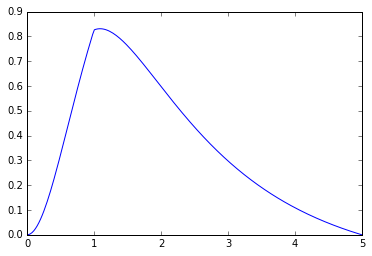

In [51]:
P = (1./np.sqrt(Norm))*np.array([(4.*np.pi*(DC(Z))**(2)*R(Z))*(1+Z)**(-1)*E(Z)**(-1) for Z in z])
plt.plot(z, P)
plt.show()

In [52]:
def P_CDF(z):
    P = lambda z: (1./np.sqrt(Norm))*(4.*np.pi*(DC(z))**(2)*R(z)*(1+z)**(-1)*E(z)**(-1))
    result = quad(P, 0, z)[0]
    return result

P_CDF(4.7)

1.7767666614087358

In [53]:
def P_CDFSquare(z):
    PSquare = lambda z: (1./np.sqrt(Norm))*(4.*np.pi*(DC(z))**(2)*R(z)*(1+z)**(-1)*E(z)**(-1))**(2)
    result = quad(PSquare, 0, z)[0]
    return result

P_CDFSquare(4.7)

7.817769573485006

In [54]:
Norm_CDF = quad(P_CDFSquare,0,5)[0]
Norm_CDF

26.605532189665404

In [55]:
from scipy import interpolate
CDF_P = np.vectorize(P_CDF)
CDF_P(z)

array([0.00000000e+00, 8.51838691e-06, 6.82139960e-05, 2.30151840e-04,
       5.44728239e-04, 1.06115417e-03, 1.82702356e-03, 2.88795899e-03,
       4.28732749e-03, 6.06601959e-03, 8.26228500e-03, 1.09116186e-02,
       1.40466907e-02, 1.76973162e-02, 2.18904573e-02, 2.66502544e-02,
       3.19980816e-02, 3.79526217e-02, 4.45299581e-02, 5.17436784e-02,
       5.96049895e-02, 6.81228379e-02, 7.73040366e-02, 8.71533938e-02,
       9.76738431e-02, 1.08866573e-01, 1.20731154e-01, 1.33265667e-01,
       1.46466821e-01, 1.60330073e-01, 1.74849740e-01, 1.90019111e-01,
       2.05830541e-01, 2.22275559e-01, 2.39344950e-01, 2.57028847e-01,
       2.75316811e-01, 2.94197905e-01, 3.13660762e-01, 3.33693657e-01,
       3.54274985e-01, 3.75074441e-01, 3.95919043e-01, 4.16789063e-01,
       4.37665833e-01, 4.58531715e-01, 4.79370075e-01, 5.00165244e-01,
       5.20902494e-01, 5.41568001e-01, 5.62148796e-01, 5.82632762e-01,
       6.03008569e-01, 6.23265658e-01, 6.43394199e-01, 6.63385062e-01,
      

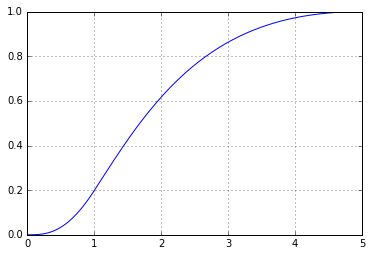

In [56]:
plt.plot(z, (1/np.amax(CDF_P(z)))*CDF_P(z))
plt.grid(True)
plt.show()

In [57]:
CDF_rand = np.sort(np.random.uniform(0,1, N))
CDF_rand

array([0.0193807 , 0.02151178, 0.02671368, 0.03209819, 0.03851992,
       0.03853507, 0.05040181, 0.05747307, 0.05868978, 0.06282179,
       0.0697511 , 0.08225432, 0.08726825, 0.08949745, 0.09244267,
       0.09355133, 0.10584223, 0.1063709 , 0.10679803, 0.12473777,
       0.12558241, 0.13159439, 0.13725397, 0.13822332, 0.14070772,
       0.14084037, 0.1437514 , 0.1450058 , 0.14799324, 0.1483633 ,
       0.15330412, 0.15768379, 0.16196311, 0.17190312, 0.17519609,
       0.17721946, 0.17780447, 0.18254098, 0.18390119, 0.18400186,
       0.18466417, 0.18936785, 0.19324091, 0.20009568, 0.20091178,
       0.20094151, 0.20263674, 0.20482954, 0.20821216, 0.21465806,
       0.21510229, 0.22038786, 0.22053359, 0.2233171 , 0.23326429,
       0.23703304, 0.23763886, 0.25540456, 0.25846536, 0.26960968,
       0.26972768, 0.27469835, 0.28420701, 0.28988231, 0.29145241,
       0.30266039, 0.30671934, 0.31465238, 0.32261394, 0.32455256,
       0.32637162, 0.32791312, 0.34048772, 0.34096564, 0.34694

In [58]:
z_fid = np.interp(CDF_rand, (1/np.amax(CDF_P(z)))*CDF_P(z),z)
z_fid

array([0.41261058, 0.42848189, 0.46284225, 0.49468453, 0.52891835,
       0.52899218, 0.58408643, 0.61348891, 0.6183524 , 0.634488  ,
       0.66022479, 0.70351689, 0.71969806, 0.72689222, 0.73604663,
       0.73946278, 0.77632587, 0.77788512, 0.77913471, 0.82890003,
       0.83112288, 0.8468807 , 0.86145617, 0.86390863, 0.87019413,
       0.87052972, 0.87789461, 0.88101301, 0.88832153, 0.88922686,
       0.90131418, 0.91179291, 0.92193304, 0.94501314, 0.95258283,
       0.95716402, 0.95847055, 0.96904874, 0.97208654, 0.97231137,
       0.97379052, 0.98417823, 0.99259755, 1.00747263, 1.00922809,
       1.00929204, 1.0129385 , 1.01765526, 1.02493134, 1.03877787,
       1.03973135, 1.0510761 , 1.05138888, 1.05736076, 1.07868501,
       1.0867622 , 1.0880605 , 1.12614412, 1.13270972, 1.15663838,
       1.15689225, 1.16758648, 1.18806393, 1.20030825, 1.2036957 ,
       1.22795243, 1.2367629 , 1.25400832, 1.27138681, 1.27562103,
       1.27959415, 1.28296925, 1.31060357, 1.3116591 , 1.32487

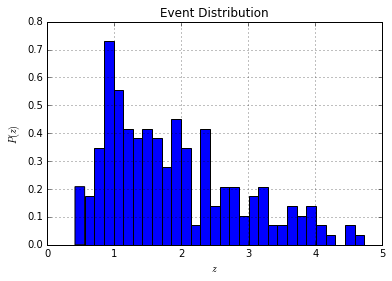

In [59]:
count, bins, ignored = plt.hist(z_fid, 30, normed=True)
#plt.plot(z, (0.6/np.amax(P))*P)
plt.grid(True)
plt.xlabel('$z$')
plt.ylabel('$P(z)$')
plt.title('Event Distribution')
plt.savefig('eventdistributionIM2B.png')
plt.show()

In [60]:
dl = np.array([(1 + Z)*DC(Z) for Z in z_fid])
dl

array([ 0.52825452,  0.55245499,  0.60565052,  0.65589455,  0.71088547,
        0.71100512,  0.80151914,  0.85078959,  0.85900181,  0.8863716 ,
        0.93041442,  1.00553592,  1.03393623,  1.04661782,  1.06280304,
        1.06885659,  1.13464393,  1.13744507,  1.13969098,  1.22988826,
        1.23395066,  1.26282923,  1.28966457,  1.2941914 ,  1.30580838,
        1.30642923,  1.32006984,  1.3258543 ,  1.33943166,  1.34111551,
        1.36363879,  1.38322679,  1.40223611,  1.44569933,  1.46001253,
        1.46868874,  1.47116503,  1.49124507,  1.49702168,  1.49744939,
        1.50026389,  1.52005923,  1.53614148,  1.56463737,  1.56800712,
        1.5681299 ,  1.5751343 ,  1.58420378,  1.59821451,  1.62494419,
        1.62678801,  1.64875775,  1.64936428,  1.66095309,  1.70246262,
        1.71823733,  1.72077554,  1.79554791,  1.80849987,  1.85585298,
        1.85635661,  1.87759538,  1.91838988,  1.94286073,  1.9496409 ,
        1.99831977,  2.01605557,  2.05085441,  2.08603163,  2.09

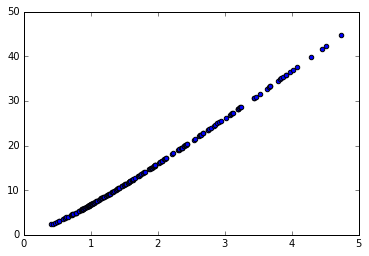

In [61]:
plt.scatter(z_fid, (h/3.)**(-1)*dl)
plt.show()

In [62]:
m = 5*np.log10((h/3000)**(-1)*dl)+25
m

array([41.8229551 , 41.92022352, 42.1198495 , 42.29290913, 42.46773719,
       42.46810266, 42.72830851, 42.85784985, 42.8787094 , 42.94681816,
       43.05212117, 43.22072695, 43.28120777, 43.30767964, 43.34100295,
       43.35333621, 43.48303698, 43.48839118, 43.49267456, 43.65806729,
       43.66522798, 43.71546214, 43.76112285, 43.76873155, 43.78813627,
       43.78916846, 43.81172356, 43.82121802, 43.84334181, 43.84606994,
       43.88223575, 43.91320597, 43.94284474, 44.00912891, 44.03052193,
       44.04338783, 44.04704598, 44.07648412, 44.08487945, 44.08549977,
       44.0895773 , 44.11804157, 44.1408951 , 44.1808075 , 44.18547916,
       44.18564919, 44.19532696, 44.20779424, 44.22691436, 44.26293126,
       44.26539383, 44.29452325, 44.29532193, 44.31052584, 44.36412694,
       44.38415477, 44.38736013, 44.479724  , 44.49533142, 44.55145685,
       44.55204606, 44.57674905, 44.62342339, 44.65094736, 44.65851214,
       44.71206393, 44.7312515 , 44.76841317, 44.80534345, 44.81

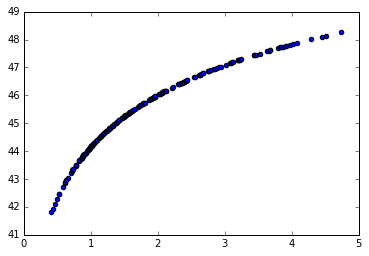

In [63]:
plt.scatter(z_fid, m)
plt.show()

In [64]:
q=0.03
N_BNS=(1/(1+q))*N
N_BHNS = N-int(N_BNS)
mass_1 =np.random.uniform(1,2, int(N_BNS))*M_solar
mass_2 = np.random.uniform(1,2, int(N_BNS))*M_solar
M_total1 = mass_1 + mass_2
eta1 =((mass_1*mass_2)/(M_total1**2))
M_chirp1 = M_total1*eta1**(3./5.)
#np.amax(mass_1/mass_2), np.amin(mass_1/mass_2)
mass_3 = np.random.uniform(1,2, N_BHNS)*M_solar
mass_4 = np.random.uniform(3,10, N_BHNS)*M_solar
M_total2 = mass_3+mass_4
eta2 =((mass_3*mass_4)/(M_total2**2))
M_chirp2 = M_total2*eta2**(3./5.)
M_total = np.concatenate((M_total1, M_total2), axis=None)
M_chirp = (1+z_fid)*np.concatenate((M_chirp1, M_chirp2), axis=None)
int(N_BNS)

194

In [65]:
phi_1 = np.random.uniform(0, 2*np.pi, N)
phi_2 = phi_1 + (2*np.pi/3.)
phi_3 = phi_1 + (4*np.pi/3.)
theta = np.random.uniform(0, np.pi, N)
psi = np.random.uniform(0, 2*np.pi, N)
F1_plus = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_1)*np.cos(2*psi)-np.cos(theta)*np.sin(2*phi_1)*np.sin(2*psi))
F1_times = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_1)*np.sin(2*psi)-np.cos(theta)*np.sin(2*phi_1)*np.cos(2*psi))
Amp_1 = (H0/dl)*np.sqrt(4*F1_plus**2+4*F1_plus**2)*np.sqrt(5*np.pi/96.)*np.pi**(-7./6.)*M_chirp**(5./6.)

In [66]:
# em Hz
f0 = 200
f_lower = 1.
M_obs = (1+z_fid)*M_total
f_LSO = (1./(6.**(3./2.)*2*np.pi*M_obs))
f_upper = 2*f_LSO
x_lower = f_lower/f0
x_upper = f_upper/f0
f = np.linspace(1,10**4, N)
x = f/f0
S0 = 1.449*10**(-52)
p1=-4.05
p2 = -0.69
a1 = 185.62
a2 = 232.56
b1=31.18
b2 = -64.72
b3 = 52.24
b4 = -42.16
b5 = 10.17
b6 = 11.53
c1 = 13.58
c2 = -36.46
c3 = 18.56
c4 = 27.43
def S_h(x):
    return S0*(x**p1 + a1*x**p2 + a2*((1+ b1*x + b2*x**2 + b3*x**3+b4*x**4 + b5*x**5 + b6*x**6)/(1 + c1*x + c2*x**2 + c3*x**3+c4*x**4)))
S_h(239)


8.097623759624806e-46

In [67]:
def h_1(x):
    return Amp_1*(f0*x)**(-7./6.)

In [68]:
rho_1 = np.zeros(len(Amp_1))
for i in range(len(Amp_1)):
    integ_H = lambda y: (4.*f0*(Amp_1[i]*(f0*y)**(-7./6.))**2)/(S_h(y))
    rho_1[i] = np.sqrt(quad(integ_H, x_lower, x_upper[i])[0])
   # print rho_H[i]
rho_1

array([18.54055886, 25.45839705,  0.26295621, 14.94432457,  3.1220955 ,
        5.3745414 ,  8.07508582,  2.79298803, 22.80548482,  0.81190833,
       12.53004004, 26.04243662,  4.55865725, 19.21836521, 10.6215936 ,
        1.82695095,  4.70849056,  2.39957245,  7.17327392, 11.08811789,
        5.53773782,  9.88467251,  7.68958828,  2.78764334,  8.49264514,
        2.57848164, 13.86098567,  9.9520071 ,  4.18596653, 16.34625833,
        7.13781907, 12.61055   , 17.03505697,  8.25599247, 14.35297882,
        3.50912774,  5.46567543,  2.64387833,  7.89055311, 11.50142391,
        6.94387956,  3.54700596,  3.57208231,  5.96784238,  6.56053909,
       11.65943779,  1.19196455,  1.81993012, 11.5129389 , 11.41761746,
        1.97051228, 14.0432606 , 17.83205777,  0.65051405, 11.16878768,
        8.7124071 , 15.48183619,  1.76969118,  7.18721597,  7.0296237 ,
        0.678308  , 18.16061819,  7.58370171,  1.49517504,  1.13164169,
        5.45928093,  0.28445011,  5.04879797,  0.69985828,  1.42

In [69]:
F2_plus = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_2)*np.cos(2*psi)-np.cos(theta)*np.sin(2*phi_2)*np.sin(2*psi))
F2_times = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_2)*np.sin(2*psi)-np.cos(theta)*np.sin(2*phi_2)*np.cos(2*psi))
Amp_2 = (H0/dl)*np.sqrt(4*F2_plus**2+4*F2_plus**2)*np.sqrt(5*np.pi/96.)*np.pi**(-7./6.)*M_chirp**(5./6.)
def h_2(x):
    return Amp_2*(f0*x)**(-7./6.)

In [70]:
rho_2 = np.zeros(len(Amp_2))
for i in range(len(Amp_2)):
    integ_2 = lambda y: (4.*f0*(Amp_2[i]*(f0*y)**(-7./6.))**2)/(S_h(y))
    rho_2[i] = np.sqrt(quad(integ_2, x_lower, x_upper[i])[0])
   # print rho_H[i]
rho_2

array([11.70815932,  5.78670041, 14.57663255, 22.84682065, 21.37529102,
       23.43375538, 10.74779653, 17.50512663, 11.26829711, 14.80290588,
        4.14740492,  6.58857731,  4.46523238,  0.30987244, 18.26549858,
        8.44897417,  6.65742165, 19.72865765, 11.48747473,  7.79275313,
        4.59604873, 16.27141571,  4.0904604 ,  7.18997391,  9.3706167 ,
       12.74725051, 10.21636664, 13.17626626,  0.06493046,  3.94895587,
       11.09148867,  5.26639781,  2.24237974,  7.20418162,  1.46825238,
       10.68083073,  8.91850776,  9.70627207,  4.7291219 ,  2.99519923,
       13.93540588,  4.86050284, 10.15932054,  8.19240383,  8.78263105,
       13.73133452,  6.21181169,  4.37398162,  9.6686091 , 15.04957959,
        3.31849454,  9.52839468, 11.4931706 ,  4.0907518 , 14.81921285,
        4.98824401, 15.35900558, 10.65501824,  7.50617279,  2.82183553,
       10.24265119,  6.95398567, 10.92766412,  9.72382171, 11.44585788,
        3.65246555, 10.0564668 ,  6.51278441,  4.72755025, 10.80

In [71]:
F3_plus = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_3)*np.cos(2*psi)-np.cos(theta)*np.sin(2*phi_3)*np.sin(2*psi))
F3_times = (np.sqrt(3)/2)*(0.5*(1+np.cos(theta)**2)*np.cos(2*phi_3)*np.sin(2*psi)-np.cos(theta)*np.sin(2*phi_3)*np.cos(2*psi))
Amp_3 = (H0/dl)*np.sqrt(4*F3_plus**2+4*F3_plus**2)*np.sqrt(5*np.pi/96.)*np.pi**(-7./6.)*M_chirp**(5./6.)

In [72]:
def h_3(x):
    return Amp_3*(f0*x)**(-7./6.)

In [73]:
rho_3 = np.zeros(len(Amp_3))
for i in range(len(Amp_3)):
    integ_3 = lambda y: (4.*f0*(Amp_3[i]*(f0*y)**(-7./6.))**2)/(S_h(y))
    rho_3[i] = np.sqrt(quad(integ_3, x_lower, x_upper[i])[0])
   # print rho_H[i]
rho_3

array([ 6.83239954, 19.67169665, 14.83958876,  7.90249608, 18.25319552,
       18.05921398,  2.67271071, 14.7121386 , 11.5371877 , 13.99099755,
        8.38263512, 19.4538593 ,  9.02388962, 19.52823766,  7.64390498,
       10.27592512, 11.36591221, 17.3290852 , 18.66074865, 18.88087103,
        0.94168909,  6.38674321, 11.78004868,  9.97761724,  0.87797156,
       10.16876887,  3.64461902,  3.22425915,  4.12103607, 12.39730246,
        3.9536696 ,  7.34415219, 19.27743671,  1.05181084, 12.88472644,
       14.18995847, 14.38418318,  7.06239374, 12.61967502,  8.50622468,
        6.99152631,  1.31349688,  6.58723824,  2.22456146,  2.22209196,
        2.07189673,  5.01984714,  6.19391174,  1.8443298 ,  3.63196213,
        1.34798227,  4.51486591,  6.33888717,  3.44023775,  3.65042516,
       13.70065111,  0.12283061, 12.42470942, 14.69338877,  4.20778817,
        9.56434319, 11.20663252,  3.34396241,  8.22864666, 10.3142162 ,
        9.11174648,  9.77201669,  1.46398644,  4.02769197,  9.37

In [74]:
rho_tot = np.sqrt(rho_1**2+rho_2**2+rho_3**2)
rho_tot[rho_tot < 8.0] = np.random.uniform(8., 20.)
rho_tot

array([22.96769473, 32.6893183 , 20.80290261, 28.42111003, 28.28126046,
       30.06928327, 13.70640448, 23.03643338, 27.93154771, 20.38463221,
       15.63558257, 33.16731068, 11.05215997, 27.40061402, 22.4694453 ,
       13.42823709, 13.98839185, 26.36806922, 23.05735186, 23.24135647,
       15.81852119, 20.08124021, 14.65029628, 12.61029445, 12.67692048,
       16.50893162, 17.60069086, 16.82415778, 15.81852119, 20.8922838 ,
       13.76957099, 15.51442841, 25.82326469, 11.00763147, 19.34373133,
       18.10384059, 17.78533425, 12.29142854, 15.61670964, 14.61539697,
       17.06735013, 15.81852119, 12.62391672, 10.37686354, 11.18539109,
       18.13242381,  8.07503865, 15.81852119, 15.14699034, 19.23650132,
       15.81852119, 17.56096488, 22.14174215, 15.81852119, 18.91233702,
       16.98518344, 21.80828722, 16.46312925, 17.99706579,  8.66509355,
       14.03027676, 22.44447777, 13.71526374, 12.82571179, 15.44899128,
       11.23246085, 14.02518258,  8.36958649, 15.81852119, 14.38

In [75]:
sigma_dl = np.sqrt(((2*dl)/rho_tot)**2 +(0.05*z_fid*dl)**2)
np.amax(sigma_dl), np.amin(sigma_dl)

(3.0997390143040535, 0.03581270852742683)

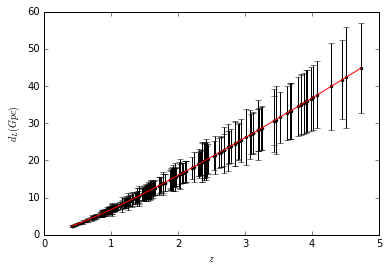

In [76]:
plt.errorbar(z_fid, (h/3.)**(-1)*dl, (h/3.)**(-1)*sigma_dl,  fmt=".k")
plt.plot(z_fid, (h/3)**(-1)*dl, 'r')
plt.xlabel('$z$')
plt.ylabel('$d_L(Gpc)$')
#plt.ylim((0,100))
plt.show()

In [77]:
m_err = (5./np.log(10))*(sigma_dl/dl)
np.amax(m_err), np.amin(m_err)

(0.6962336989295699, 0.14076496690055076)

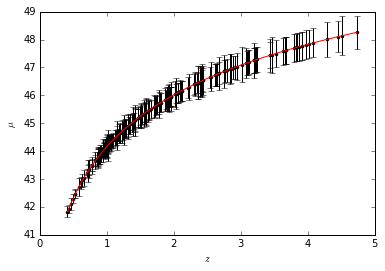

In [78]:
plt.errorbar(z_fid, m, m_err, fmt='.k')
plt.plot(z_fid, m, 'r')
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.show()

In [79]:
dl_fid = np.sqrt((np.random.normal(dl, sigma_dl))**2)
#dl = np.array([(1 + Z)*DC(Z) for Z in z_eff]) + np.random.normal(0, sigma_dl, N)
np.amin(dl_fid), np.amax(dl_fid)

(0.5397109493122224, 11.73507116522505)

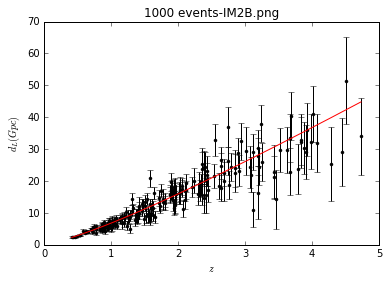

In [80]:
plt.errorbar(z_fid, (h/3.)**(-1)*dl_fid, (h/3.)**(-1)*sigma_dl,  fmt=".k")
plt.plot(z_fid,(h/3.)**(-1)*dl, 'r' )
plt.xlabel('$z$')
plt.ylabel('$d_L(Gpc)$')
#plt.savefig('dL(z)-1000events_IM2B')
#plt.ylim((0,400))
plt.title('1000 events-IM2B.png')
plt.show()

In [81]:
m_fid = np.random.normal(m, m_err, N)
#mu = 5*np.log10((h/3000)**(-1)*dl)+25
np.amax(m_fid), np.amin(m_fid)
#len(mu_fid)/

(48.66987095060321, 41.764294880986)

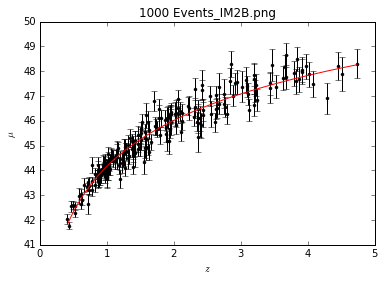

In [82]:
plt.errorbar(z_fid, m_fid, m_err, fmt='.k')
plt.plot(z_fid, m, 'r')
plt.xlabel('$z$')
plt.ylabel('$\mu$')
#plt.savefig('mu(z)-1000Events-IM2B')
#plt.ylim((40,55))
plt.title('1000 Events_IM2B.png')
plt.show()

In [105]:
#definir likelihood
c=3.e5
def lnlike(theta, z_fid, m_fid, m_err):
    Om_m, H_0, w, lamb = theta
    def DL(zz, Om_m, H_0, w, lamb):

        E = lambda zz :  np.sqrt( Om_m*(1+zz)**3+(1-Om_m)*(1+zz)**3*((lamb/(lamb+3*w))*(1-(1+zz)**(3*w+lamb)))+(1-Om_m)*(1+zz)**(3*(1+w)+lamb))**(-1)
        result = quad(E, 0, zz)[0]
        return result

    dl = (c/H_0)*np.array([(1 + Z) * DL(Z, Om_m, H_0, w, lamb) for Z in z_fid])
    

    mu = 5*np.log10(dl)+25
    
    result = -0.5 * np.sum((m_fid-mu)**2/m_err**2)
    # print result 
    return result

In [106]:
#priors

def lnprior(theta):
    Om_m, H_0, w, lamb = theta
    if 0.0 <= Om_m <= 1.0  and 20.0 <= H_0 <= 100.0 and -0.99 <= w <= -0.1 and -0.99 <= lamb <= 0.99:
        return 0.0
    return -np.inf

In [107]:
#posterior

def lnprob(theta, z_fid, m_fid, m_err):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, z_fid, m_fid, m_err)

In [108]:
#cadeia de Markov

set_ini = 0.3, 70.0, -0.99, 0.1

ndim, nwalkers = 4, 16
pos = [set_ini + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]


sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(z_fid, m_fid, m_err))
sampler.run_mcmc(pos, 5000, progress=True)
#sampler.run_mcmc(pos, 1000);

samples = sampler.chain[:, 500:, :].reshape((-1, ndim))

np.savetxt("chainInt2b_200events.txt",samples)

  3%|▎         | 151/5000 [01:06<38:09,  2.12it/s]/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  



ValueError: Probability function returned NaN

In [90]:
Om_m_mcmc, H_0_mcmc, w_mcmc, lamb_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))

In [91]:
Om_m_mcmc, H_0_mcmc, w_mcmc, lamb_mcmc

((0.1863525049908087, 0.09797964950343296, 0.10808822310373412),
 (62.817224030949816, 3.0797357592880417, 2.599156373115491),
 (-0.5256642585570636, 0.14757740229560984, 0.24383147000414285),
 (-0.09014306534784683, 0.13007515501852882, 0.14233508322940658))

/home/riisrhavia/.local/lib/python2.7/site-packages/numpy/ma/core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/riisrhavia/.local/lib/python2.7/site-packages/numpy/ma/core.py:6461: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/lib/python2.7/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


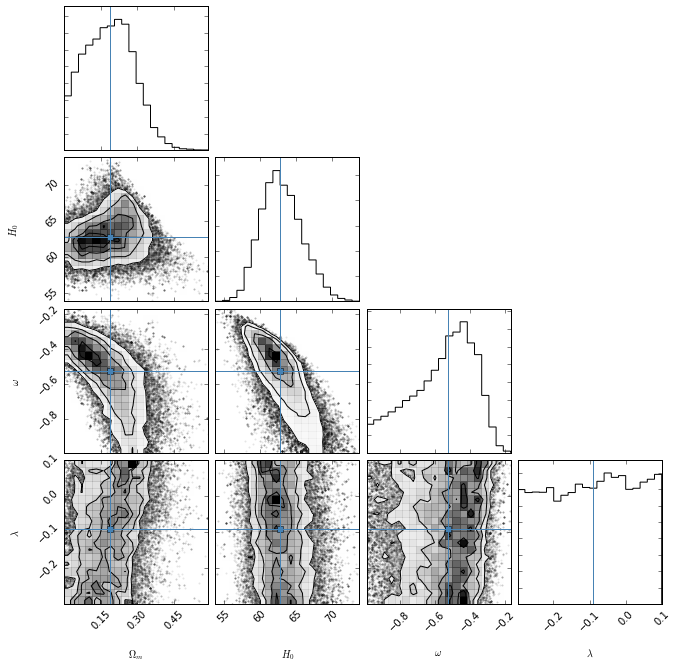

In [92]:
fig = corner.corner(samples, labels=["$\Omega_m$", "$H_0$", "$\omega$", "$\lambda$"],
                    truths=[Om_m_mcmc[0], H_0_mcmc[0], w_mcmc[0], lamb_mcmc[0]])
fig.savefig("ParametersIm2b_200.png")
fig.show()

In [60]:
print(emcee.__version__)

3.0rc1


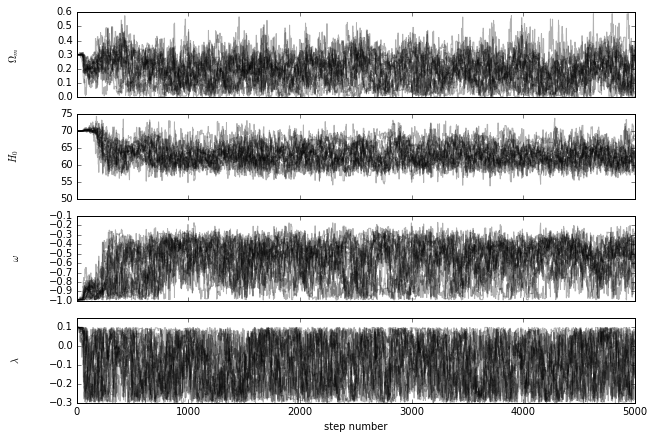

In [93]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["$\Omega_m$", "$H_0$", "$\omega$", "$\lambda$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [94]:
tau = sampler.get_autocorr_time()
print(tau)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 3 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 100;
tau: [122.45976142 134.14511374 162.58769107  85.35222507]

In [ ]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

In [51]:
50*72.98946629, 50*101.06496197, 50*54.146707231, 50*63.68384417


(3649.4733145, 5053.2480985, 2707.33536155, 3184.1922085)

In [53]:
tau[0:,]

NameError: name 'tau' is not defined

In [42]:
np.savetxt('SS_1000.txt', np.transpose([z_fid, m_fid, m_err]))